# Seaborn Visualization Library

Seaborn is a Python visualization library based on matplotlib.  It provides a much higher level interface
for drawing attractive figures, especially for common tasks in data analysis and statistical graphics.
Seaborn fills a gap in Python, and allows us to easily create a lot of figures similar to the R language
ggplot2 library (though it does not use the same language of visualization, but a more standard function
call based interface).

This lecture notebook is based on the standard seaborn tutorial (v 0.8.1) found 
[here](https://seaborn.pydata.org/tutorial.html).
I have redone some of the examples that I think will be of most use to this class, but if you want
more details you can look at the full Seaborn tutorial at that link.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,8) # set default figure size a bit bigger for all figures

In [2]:
# set a random seed, so that the random distributions we generate below
# will always be exactly recreated
np.random.seed(55)

## Visualizing the Distribution of a Dataset

When dealing with a set of data, often the first thing you'll wnat to do is get a sense for how the
variables are distributed.  Commonly we visualize data sets with a single variable (univariate) or
two possibly related variables (bivariate).  Larger numbers of variables are also common, but we can
not so easily visualize more than 2 dimensions, so other methods may be needed for such multivariate
data to explore the datas distribution.

## Plotting Univariate Distributions

The `distplot()` function provides a lot of options for displaying univariate data.  The default
behavior is to plot a histogram of the data and fit a kernel density estimate (KDE) to the data.
The KDE is an estimate of the probability distribution of the data, thus the area under the KDE
estimate will add up to 1.  The histogram bars, thus, don't represent counts for the ranges of data,
but instead are the ratio of the number of items in each bin of the histogram.

In [3]:
# generate a random data set of 100 values.  The 100 values are actually governed by a standard normal
# distribution, with a mean of 0 and a standard deviation of 1.
x = np.random.normal(size=100)

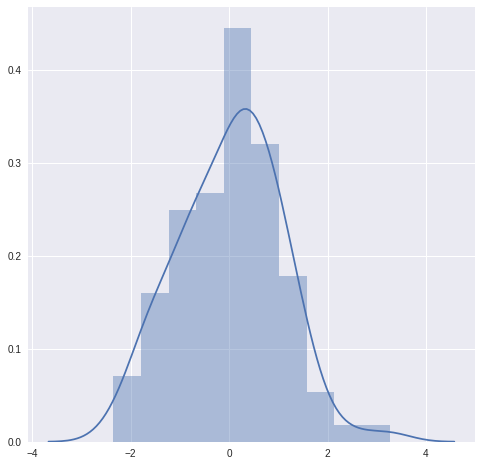

In [4]:
sns.distplot(x);

## Histograms

Histograms are likely familar, and we did look at the `hist()` function from the standard matplotlib plotting
library in the matplotlib lecture notebook.  A histogram represents the distribution of the data by forming
bins along the range of data, and drawing bars to show the number of observations that fall in each bin.

So if you are not familiar with a histogram plot, we can recreate only the histogram.  We will add a point on
the graph for each of our 100 values using what is known as the rugplot option.

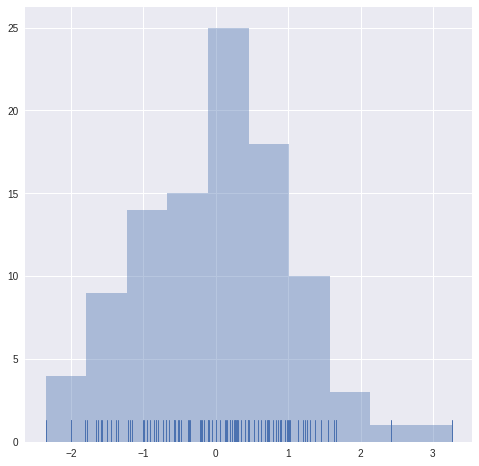

In [5]:
sns.distplot(x, kde=False, rug=True);

By not plotting the KDE, the default behavior is to plot the histogram with the absolute counts represented by each bar.  So for example, there were 25 values in x between just below 0 and about 0.5.

## Kernel Density Estimation

The KDE may be less familiar, but it can be very useful to get some ide of the shape of the distribution
of your data.  Like the histogram example, we can plot the data using only a KDE and adding a rugplot of the
data points.

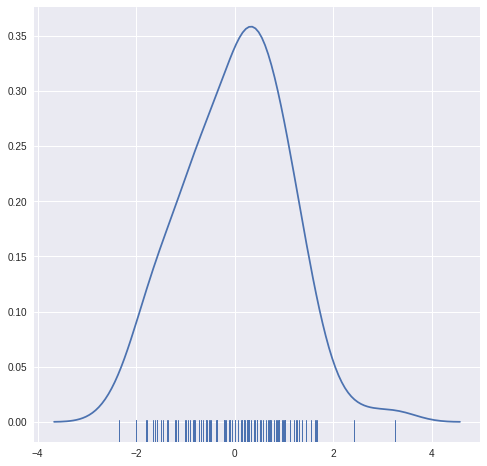

In [6]:
sns.distplot(x, hist=False, rug=True);

You should look at the full Seaborn tutorial if you want more information about how the KDE is actually
computed for a set of data.

## Fitting Parametric Distributions

You can also use `distplot()` to fit a parametric distribution to a dataset and visually evaluate how
closely it corresponds to the observed data.  For example, the data we were using previously was actually
generated from a standard normal distribution, so we can parametrically fit a standard normal to the data
and display the fit.

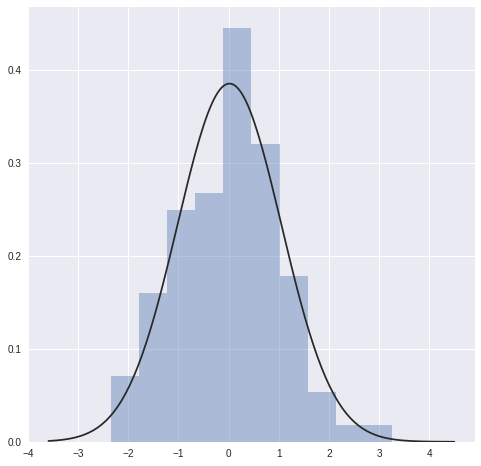

In [7]:
sns.distplot(x, kde=False, fit=stats.norm);

The `fit` parameter is using the `fit()` method from the `stats.norm` object to perform a standard least
squared fit of the data to a normal distribution.  This method returns the distribution parameters
(the fitted mean and standard deviation in the case of a normal distribution) that best fit given
the data and the assumption of the particular probability distribution.  For example, we can call the
`fit()` method ourself on our data.

In [8]:
mu, sigma = stats.norm.fit(x)
print(mu, sigma)

0.0166016805615 1.03478338586


Showing that the fitted mean was $\mu = 0.016$ and the fitted standard deviation was $\sigma = 1.034$.  Recall
that the data was generated from a standard normal distribution with a mean of 0 and a standard deviation of 1,
thus the fit was close.  The normal distribution shown on our fitted `distplot` represents a normal distribution
with the given fitted mean and standard devaition.

## Plotting Bivariate Distributions

It can also be useful to visualize bivariate distributions of two variables.  The easiest way to do this in
seaborn is to just use the `jointplot()` function, which creates a multi-panel figure that shows both
bivariate (or joint) relationship between two variables, along with the univarite (or marginal) distribution
of each on separate axes.

In [9]:
# generate a set of random bivariate data
# both will be drawn from normal distributions, the mean of x will be 0, and of y will be 1
mean = [0, 1]

# the cov value will effect the standard deviation of our bivariate variables, and will also
# effect how much covariance the two variables have with one another
cov = [(1, 0.5), (0.5, 1)]

# generate the random bivariate data using normal distributions for each variable
# we generate a set of 200 data points
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

## Scatterplots

The most basic and familiar way to visualize bivariate data is to simply produce a scatterplot.  By default
the `jointplot()` function creates a scatterplot, and produces histograms of the marginal distributions of
the two variables in the bivariate data.

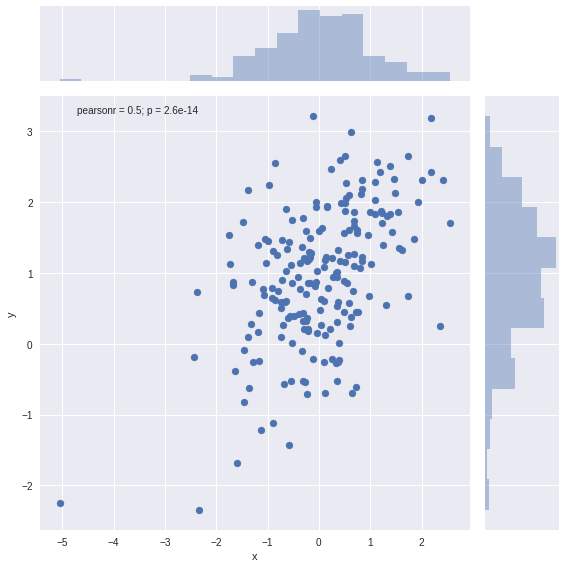

In [10]:
sns.jointplot(x="x", y="y", data=df, size=8);

By default, the `jointplot()` uses the `scipy.stats.pearsonr()` function to calculate the Pearson
correlation coefficient between the two data.

In [11]:
cor, pval = stats.pearsonr(df.x, df.y)
print("Pearsonr correlation coefficient:", cor)
print("p-value:", pval)

Pearsonr correlation coefficient: 0.504559067576
p-value: 2.58057005182e-14


So basically the data has a correlation coefficient of 0.51.  The p-value, since it is so small, 
basically tells us there is very little chance we would see this amount of correlation by chance if the
variables were in fact not correlated, thus we can conclude the variables are likely correlated in some way.

## Hexbin Plots

The bivariate analogue of a histogram is known as a "hexbin" plot.

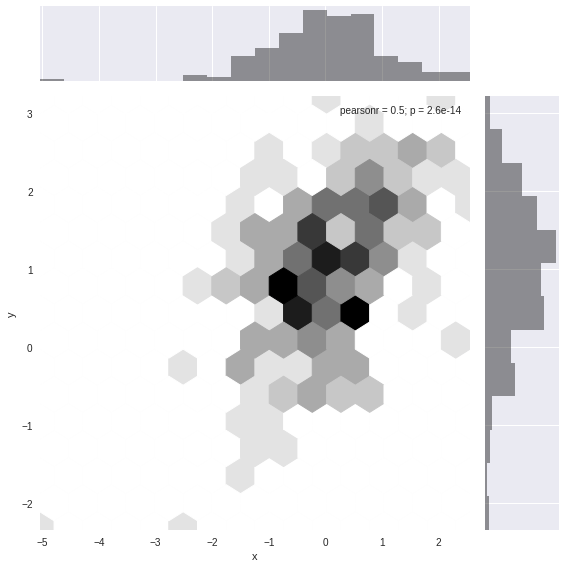

In [12]:
sns.jointplot(x="x", y="y", kind="hex", color="k", data=df, size=8);

# Kernel Density Estimation

It is also possible to use the KDE procedure to visualize bivariate data.

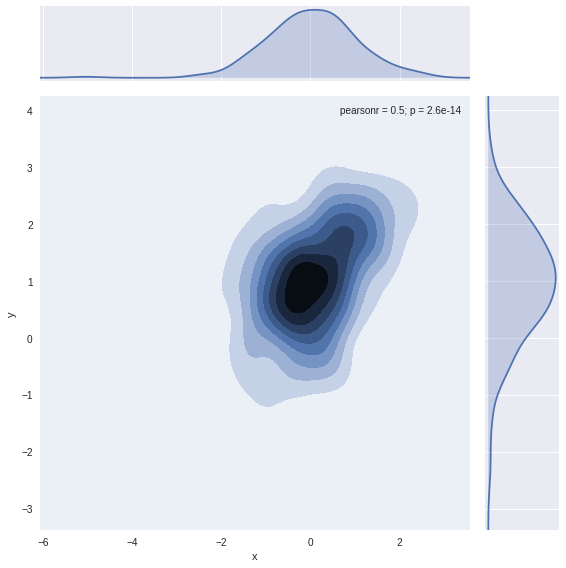

In [13]:
fig = sns.jointplot(x="x", y="y", data=df, kind="kde", size=8);

## Visualizing Pairwise Relationships in a Dataset

For multivariate data (with more than 2 variables), we can systematically plot the bivariate relationship
between all pairs of data using a `pairplot()`.  

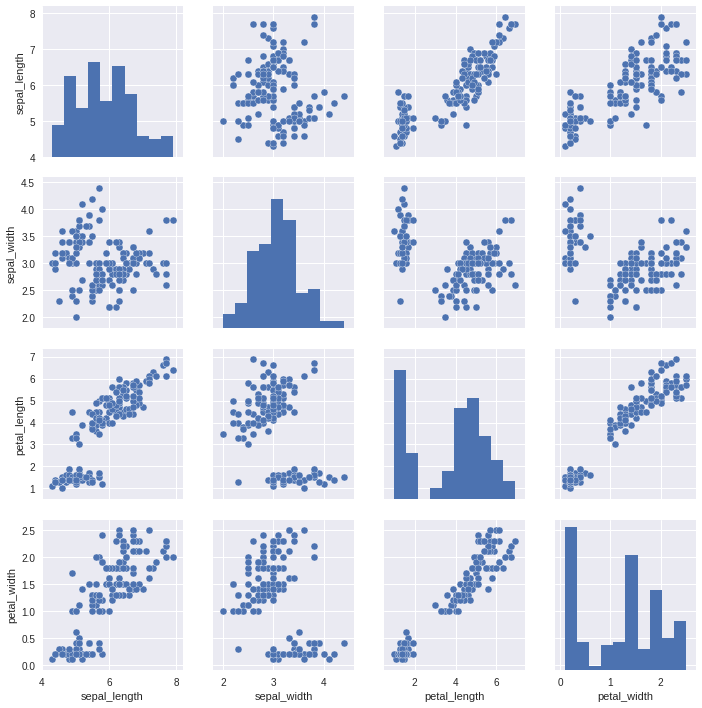

In [14]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

The iris data set has 4 variables.  By default, the diagnol shows a histogram of each
variable.  Otherwise joint scatter plots of each pait of data in the multivariate dataset
is displayed.

# Plotting with Categorical Data

If one of the main variables we are working with is categorical, it is often necessary to group by this
categorical variable, and compare the distributions of the data across the different categories.  

## Categorical Scatterplots

For example, the tips data has information about meals at a restaurant.  One varible, the "day" feature, is
a categorical variable telling which day of the week the meal was purchased on.  If we are interested
in seeing the total cost of meals eaten, grouped by the data they were eaten, we can start with a simple
scatterplot grouped by the categorical "day" feature.

In [15]:
tips = sns.load_dataset("tips")

# change style to white background, will work better for these categorical plots
sns.set(style="whitegrid", color_codes=True) 

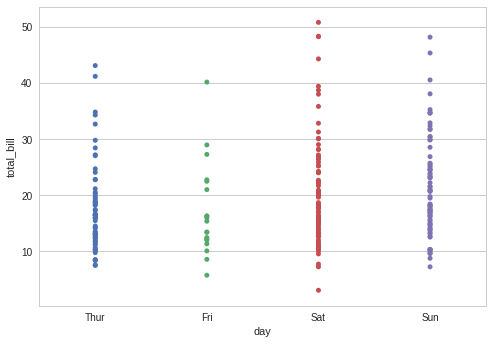

In [16]:
sns.stripplot(x="day", y="total_bill", data=tips);

The data in many places overlaps, making it harder to get a sense of how dense the distribution of the data
is in some places.  One easy solution is to "jitter" the points so that they don't overlap (so much).

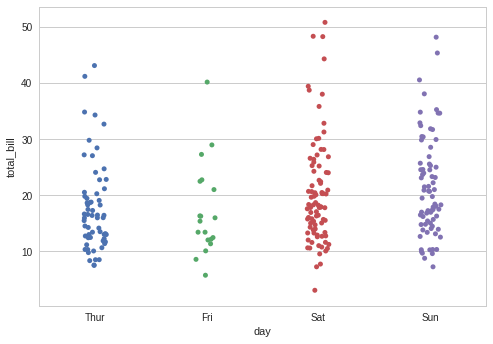

In [17]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

Jitter in a plot simply adds some random movement (along the x axis in this case).  A more structured approach
is to use an algorithm to position points that overlap so we can see them all.  This is what swarm 
type algorithms for plotting achieve.

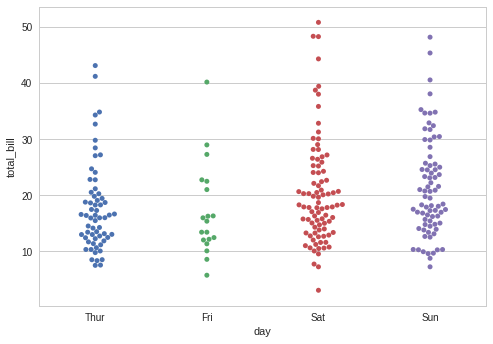

In [18]:
sns.swarmplot(x="day", y="total_bill", data=tips);

Its also possible to add a nested categorical variable with the `hue` parameter (giving a color code).  So to
see spending on meals by the sex (Male or Female) of the customer who purchased the meal:

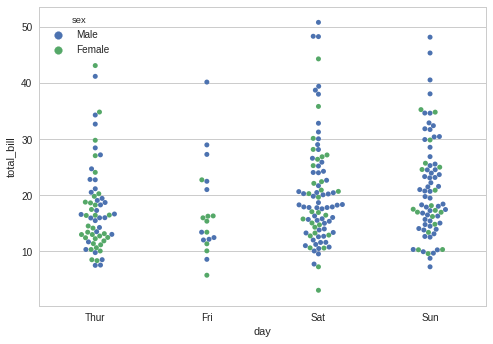

In [19]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);

## Boxplots

The above scatterplots were fine since there were not all that much data.  But at a certain point there might
be some many data points that we need to summarize the distributions somehow to properly plot them.  
Boxplots and Violin plots are common ways of doing this.

Boxplots summarize the data by plotting a box around the 25th to 75h percentile of the data, giving you
and idea of the distribution of the middle 50% of the data.  Whiskers are plotted for the minimum and
maximum values.  The line in the box represents the median (not the mean) of the data.  Also most
boxplots use an algorithm to identify points that appear to be outliers.  If outliers exist, they will
be plotted past the end of the whiskers of the boxplot as points.

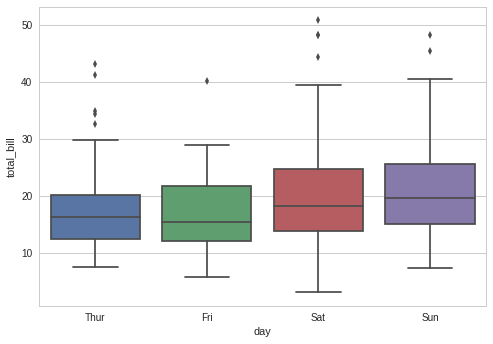

In [20]:
sns.boxplot(x="day", y="total_bill", data=tips);

## Violinplots

Boxplots are a bit of an older method for comparing the distributions of categorical data.  Violinplots are
becoming more popular.  Like the KDE, the violin plot summarizes the distribution using a KDE estimate of the
points.  By default, the violinplot created by Seaborn also plots the boxplot information inside of the
KDE (the black box and whiskers, though it doesn't show the outlier calculation).

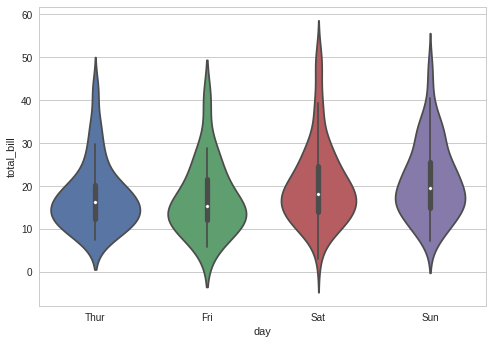

In [21]:
sns.violinplot(x="day", y="total_bill", data=tips);

If you compare and combine the swarmplot visualization with the violinplot, it should be obvious how the KDE
estimate is working on the categorical data distributions to help you visualize the distributions of each
category.

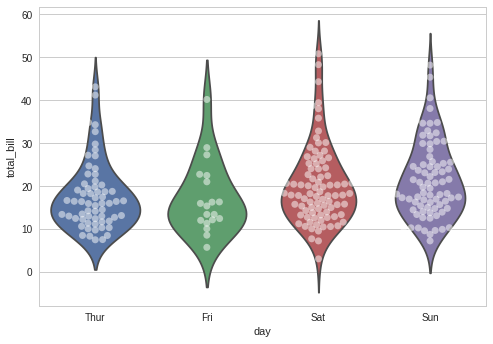

In [22]:
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=0.5, size=7);
sns.violinplot(x="day", y="total_bill", data=tips, inner=None);

# Visualizing Linear Relationships

Many datasets contain multiple quantitative variables, and the goal of an analysis is often to relate those
variables to each other.  The models of this section perform some of the common functions of performing
a linear regression between bivariate data, and estimating the best fit and confidence interval of the
regression.

## Functions to Draw Linear Regression Models

We will demonstreate the simplest invocation again using the tips data to model the relationship between
the total bill and the amount of tip left.

In [23]:
tips = sns.load_dataset("tips")
# change style to white background, will work better for these categorical plots
sns.set(style="darkgrid", color_codes=True) 

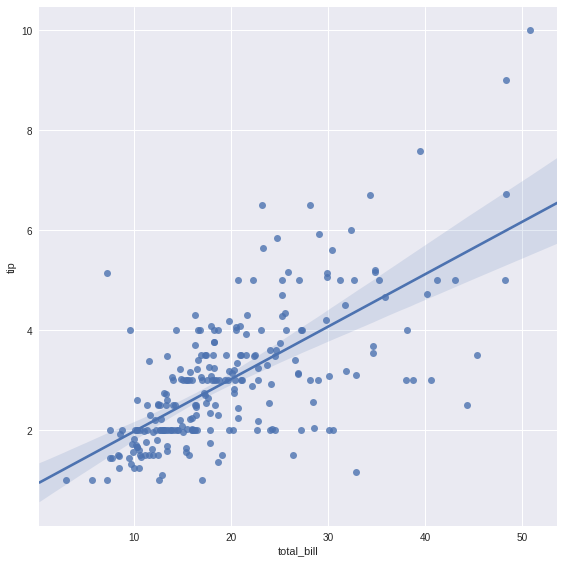

In [24]:
sns.lmplot(x="total_bill", y="tip", data=tips, size=8);

Here the line represents the best fit linear regression of the tip amount (y) as a function of the total
bill (x).  The light band by default is a 95% confidence interval for the regression, meaning we are 95%
confident that the true linear regression fit will be within the shaded band given the number of data
points we had to fit.

A linear relationship is often appropriate for a set of dependent and independent variables, but not often.  
For example, this data clearly has some nonlinear relationship.

In [25]:
anscombe = sns.load_dataset("anscombe")
df2 = anscombe.query("dataset == 'II'")

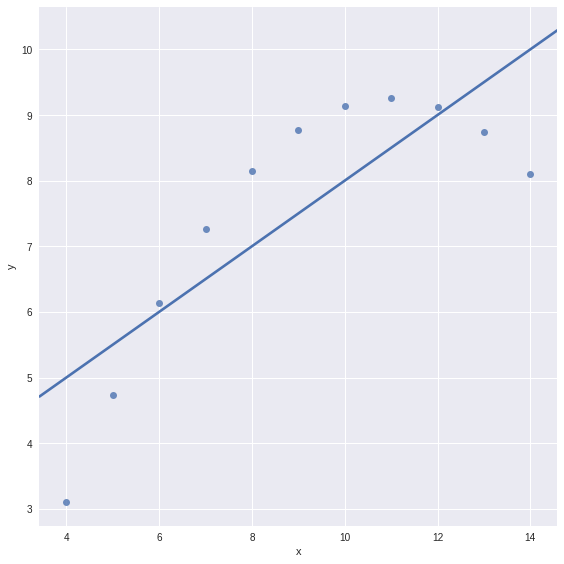

In [26]:
sns.lmplot(x="x", y="y", data=df2, ci=None, size=8);

In the presence of these kinds of higher-order relationships we can fit a polynomial regression
model to explore simple nonlinear trends in the dataset.

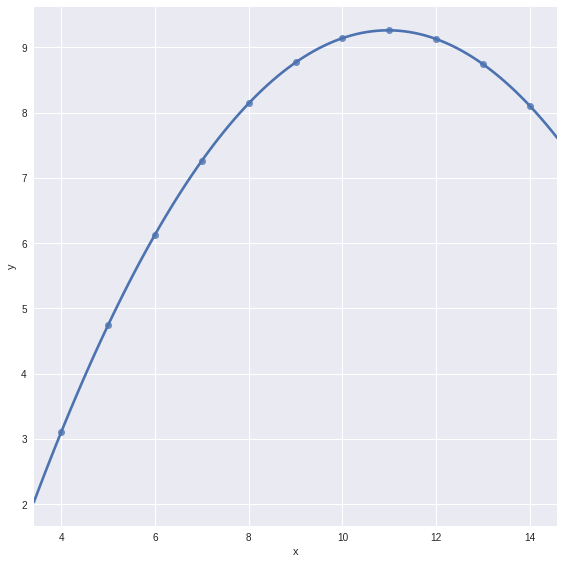

In [27]:
sns.lmplot(x="x", y="y", data=df2, order=2, ci=None, size=8);

A different problem is posed by "outlier" observations that deviation for some reason other than the 
main relationship under study.

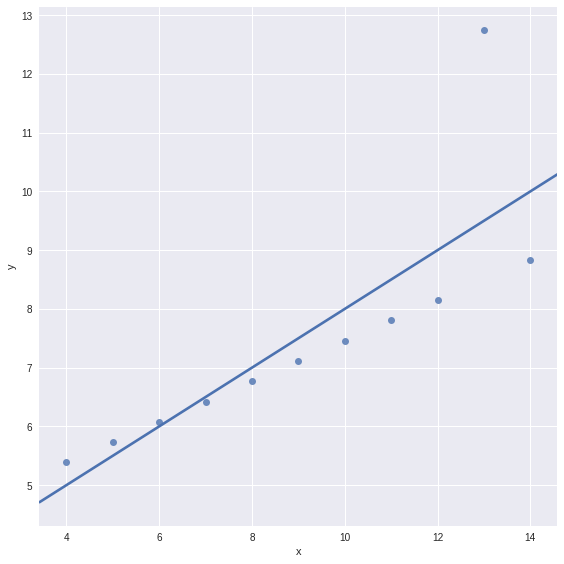

In [28]:
df3 = anscombe.query("dataset == 'III'")

sns.lmplot(x="x", y="y", data=df3, ci=None, size=8);

In the presence of suspected outliers, it can be useful to fit a robust regression, which uses a different
loss function to downweight relatively large residuals.

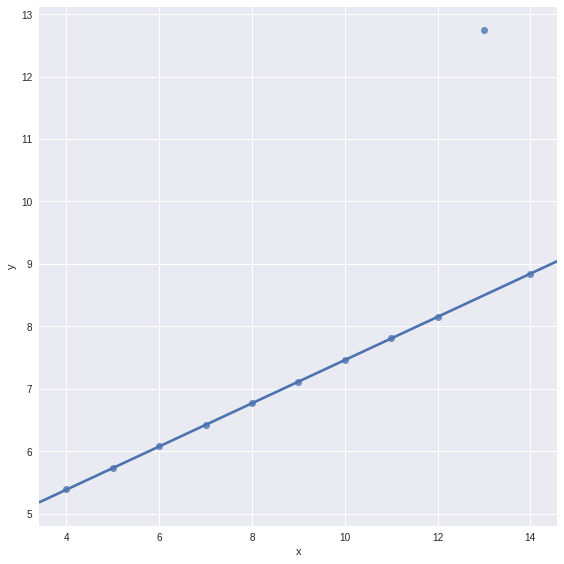

In [29]:
sns.lmplot(x="x", y="y", data=df3, robust=True, ci=None, size=8);

## Conditioning on Other Variables

The above plots for linear regression show ways of exploring the relationship between a pair of variables.
Often, however, a more interesting question is "how does the relationship between these two variables change as a 
function of a third variable?"

We can use `lmplot()` to separate out relationships based on a third categorical variable, and
explore the linear relationship conditioned on these other factors.  In this case, as before, we need
to use `hue` (the color) to differentiate between the different factors of the third variable.

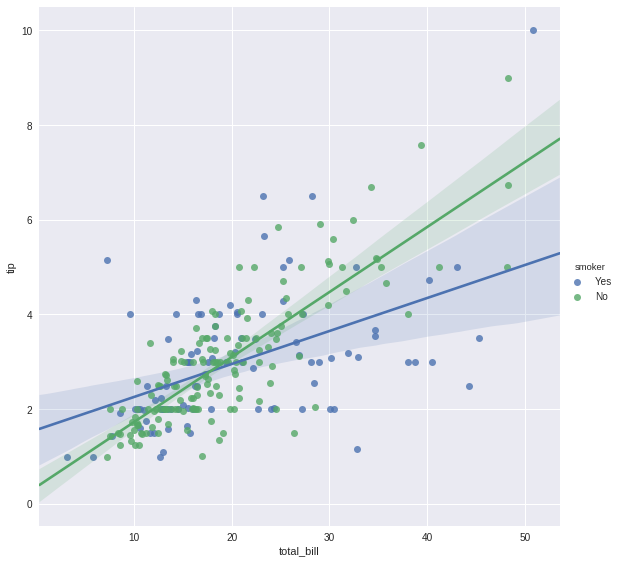

In [30]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, size=8);

## Versions

In [31]:
%load_ext version_information

%version_information numpy, scipy, matplotlib

Software versions
Python 3.6.1 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 6.4.0
OS Linux 4.13.0 46 generic x86_64 with debian stretch sid
numpy 1.12.1
scipy 0.19.0
matplotlib 2.0.2
Thu Aug 23 12:15:55 2018 CDT